In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np


example 1

In [3]:
x_data=np.random.rand(200).astype(np.float32)

y_data=x_data*0.1+0.3

In [4]:
Weights=tf.Variable(tf.random_uniform([1],-0.1,0.1))
baises=tf.Variable(tf.zeros([1]))

y=x_data*Weights+baises

loss=tf.reduce_mean(tf.square(y-y_data))
optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(loss)

init=tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [5]:
sess=tf.Session()
sess.run(init)

for step in range(401):
    sess.run(train)
    if step%20==0:
        print(step,sess.run(Weights),sess.run(baises))

0 [0.21200809] [0.3210597]
20 [0.12211546] [0.28877088]
40 [0.10607205] [0.29691693]
60 [0.10166716] [0.2991535]
80 [0.10045774] [0.29976758]
100 [0.10012568] [0.2999362]
120 [0.10003451] [0.2999825]
140 [0.10000948] [0.29999518]
160 [0.10000259] [0.2999987]
180 [0.10000072] [0.29999965]
200 [0.10000021] [0.29999992]
220 [0.10000011] [0.29999995]
240 [0.10000011] [0.29999995]
260 [0.10000011] [0.29999995]
280 [0.10000011] [0.29999995]
300 [0.10000011] [0.29999995]
320 [0.10000011] [0.29999995]
340 [0.10000011] [0.29999995]
360 [0.10000011] [0.29999995]
380 [0.10000011] [0.29999995]
400 [0.10000011] [0.29999995]


In [6]:
tf.reduce_mean?

In [7]:
optimizer.minimize?

example2

In [8]:
import tensorflow as tf

In [9]:
matrix1=tf.constant([[3,3]])
matrix2=tf.constant([[2],[2]])
matrix1.shape,matrix2.shape

(TensorShape([Dimension(1), Dimension(2)]),
 TensorShape([Dimension(2), Dimension(1)]))

In [10]:
product=tf.matmul(matrix1,matrix2)

tf.Session running method 1

In [11]:
sess=tf.Session()
result=sess.run(product)
print(result)
sess.close()

[[12]]


tf.Session running method 2

In [12]:
with tf.Session() as sess:
    result2=sess.run(product)
    print(result2) #此种方法不需要写sess.close()

[[12]]


In [13]:
#变量
import tensorflow as tf

In [14]:
state=tf.Variable(0,name='counter')
print(state.name)

new_value=tf.add(state,1)
update=tf.assign(state,new_value)
init=tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))


counter:0
1
2
3


In [15]:
#placeholder
import tensorflow as tf 

input1=tf.placeholder(tf.float32)
input2=tf.placeholder(tf.float32)

output=tf.multiply(input1,input2)
     
with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[3.0],input2:[4.]}))                 

[12.]


In [56]:
#定义添加层
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights=tf.Variable(tf.random_normal([in_size,out_size]))
    biases=tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b=tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        output=Wx_plus_b
    else:
        output=activation_function(Wx_plus_b)
    return output
    

In [18]:
#建造神经网络，输入层数量为1（1个特征），隐藏层为10（10个神经元），输出层数量为1。

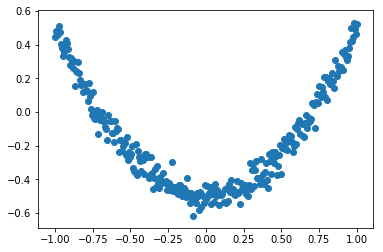

In [62]:
x_data=np.linspace(-1,1,300)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show(block=False)

xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])

layer1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(layer1,10,1,activation_function=None)

loss=tf.reduce_mean(tf.reduce_sum(tf.square(prediction-ys),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)



for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50==0:
       
        
        
        prediction_value=sess.run(prediction,feed_dict={xs:x_data})
        lines=ax.plot(x_data,prediction_value,'r-',lw=5)
        
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        plt.pause(0.1)
        
        
        #print(sess.run(loss,feed_dict={xs1:x_data1,ys1:y_data1}))
        



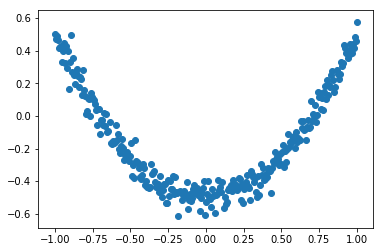

In [77]:
x_data=np.linspace(-1,1,300)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=np.square(x_data)-0.5+noise

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.show()



xs=tf.placeholder(tf.float32,[None,1])
ys=tf.placeholder(tf.float32,[None,1])

layer1=add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction=add_layer(layer1,10,1,activation_function=None)

loss=tf.reduce_mean(tf.reduce_sum(tf.square(prediction-ys),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)


for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)